In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import re

In [2]:
df = pd.read_csv('cc_capstone/profiles.csv')
df_copy = df.copy()

df_features = df_copy.columns
df_features = df
#Make a copy of the dataset so we have all the original information as we manipulate columns and values

### Create user_id column for each row; helps to group data by

In [37]:
df_copy['user_id'] = range(len(df))
df_copy.insert(0, 'user_id',)
df_copy.head()

TypeError: insert() missing 1 required positional argument: 'value'

## Split Location data
into: City and State Features
<br />
then into: California and Other States

In [ ]:
location_table = df_copy.location.str.split(pat = ',', expand = True)
del location_table[2]
location_table.rename(columns = {0: 'City', 1: 'State'}, inplace = True)
print(location_table)

## Summarize and get a feel for the data
- Find how many samples exist in the dataset
- Understand data type of each feature and how to best manipulate it to suit our interest
(df.info is more comprehensive than df.dtypes)     

In [ ]:
print(df_features)
df_features.size
df.info()

In [ ]:
df.sex.describe()
df.height.describe()

## Timeframe of the Data:
 + 2011 - 2012
 + End of June to Beginning of July (~Essentially JULY2011 - July2012)

In [ ]:
df_copy.last_online.sort_values()

In [ ]:
lo_frame = df_copy['last_online'].to_frame
date_time_table = pd.DataFrame(columns = ['dates', 
                                          'times'])

date_time_table['dates'] = df_copy['last_online'].datetime.day
# date_time_table['time'] = [datetime.date() for d in df_copy['last_online']]

## Drop Features with insufficient data; later build or average values for NA
- offspring
- diet
- **pets**

In [ ]:
df_copy.shape
#Almost 60,000 observations!

# Definitions and thoughts -- in an accompanied Google Sheets
- body_type:
- diet:
- drinks:
- drugs:
- education:

- ethnicity:
- height:
- income:
- job:
- offspring:
- orientation:
- pets:
- religion:
- sex:
- sign:
- smokes:
- speaks:
- status:


In [ ]:
df_copy.offspring.describe()

In [38]:
#To find the amount of missing data in each respective column
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent Missing'])
    return missing_data
#Example on how to build your own table
draw_missing_data_table(df_copy)

init_drop_cols = ['offspring', 'diet', 'religion', 'pets']

# EssayQuestions include:
- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…


In [ ]:
corr = df_copy.corr()
ax = sns.heatmap(corr, vmin = -1, vmax= 1, center = 0, cmap = sns.diverging_palette(20,220, n=200), square = True)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation= 45, horizontalalignment = 'right'
)

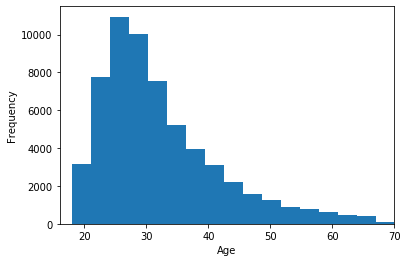

In [4]:
# plt.figure(figsize = (50,20))
# sns.barplot(x = df['height'], y = df['age'])

plt.hist(df_copy.age, bins = 30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(16,70)

# plt.boxplot(df_copy.age)
plt.show()

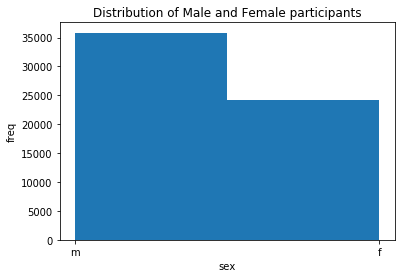

In [5]:
plt.hist(df_copy.sex, bins = 2, align = 'mid')
plt.xlabel('sex')
plt.ylabel('freq')
plt.title('Distribution of Male and Female participants')
plt.show()

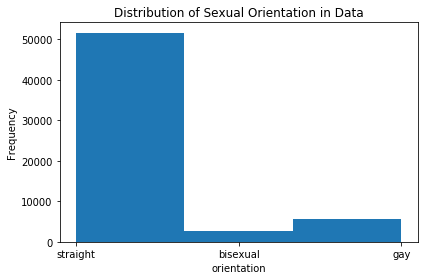

In [6]:
plt.hist(df_copy.orientation, bins = 3)
plt.xlabel('orientation')
plt.ylabel('Frequency')
plt.title('Distribution of Sexual Orientation in Data')
plt.tight_layout()
plt.show()

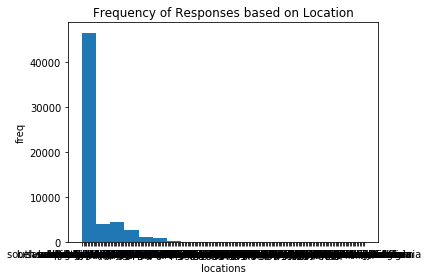

In [7]:
plt.hist(df_copy.location, bins = 20, orientation = 'vertical')
plt.xlabel('locations')
plt.ylabel('freq')
plt.title('Frequency of Responses based on Location')
# plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

In [8]:
# plt.hist(df_copy.drinks.value_counts, bins = 8)
# plt.xlabel('Drinks')
# plt.ylabel('Frequency')
# plt.title('Frequency of Drinks based on individual preference')
# plt.show()

In [9]:
unique_edu = df_copy['education'].unique().dtype
# sorted(unique_edu)

In [29]:
loc_data = df_copy.groupby(['location', 'sex'])['sex'].count().sort_values(ascending = False)
print(loc_data.head(60))
loc_data.to_frame()
print(loc_data['sex'])
location_data = df_copy.groupby(['location'])['sex'].count().sort_values(ascending = False)

location                         sex
san francisco, california        m      18799
                                 f      12265
oakland, california              m       3723
                                 f       3491
berkeley, california             m       2455
                                 f       1757
san mateo, california            m        852
palo alto, california            m        695
alameda, california              m        543
hayward, california              m        498
daly city, california            m        491
san mateo, california            f        479
emeryville, california           m        469
redwood city, california         m        434
san rafael, california           m        415
san leandro, california          m        401
vallejo, california              m        387
walnut creek, california         m        387
palo alto, california            f        369
alameda, california              f        367
san rafael, california           f        3

KeyError: 'sex'

In [10]:
df_copy['education'].nunique()

32

## Create a dictionary that maps the 32 different education features to 4:
- Graduated High School
- Graduated College/ University
- Graduated Masters or PhD program
- Other

In [11]:
df_copy['ethnicity'].unique()
df_copy['ethnicity'].dropna()

0               asian, white
1                      white
3                      white
4        asian, black, other
5                      white
                ...         
59940         middle eastern
59942           white, other
59943                  asian
59944           asian, black
59945                  white
Name: ethnicity, Length: 54266, dtype: object

In [12]:
df_copy['ethnicity'].nunique()

217

In [13]:
df_copy['status'].unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

In [14]:
plt.rcParams['figure.figsize'] = [20,20]
plt.rcParams['axes.labelsize'] = 50
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['legend.fontsize'] = 25
for i in init_drop_cols:
    df_copy[init_drop_cols][i].hist()
plt.tight_layout()
plt.legend(init_drop_cols)
# df_copy['offspring'].hist()

NameError: name 'init_drop_cols' is not defined

In [15]:
df_copy.diet.value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

In [16]:
df_copy.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [17]:
df_copy.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [18]:
df_copy.education.value_counts()
# edu_table = pd.DataFrame(['In School', 
#                           'Graduated', 
#                           ''])

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [19]:
df_copy.ethnicity.value_counts()

white                                                                                        32831
asian                                                                                         6134
hispanic / latin                                                                              2823
black                                                                                         2008
other                                                                                         1706
                                                                                             ...  
middle eastern, black, native american, indian, pacific islander, hispanic / latin, white        1
black, native american, pacific islander, hispanic / latin                                       1
middle eastern, native american, white, other                                                    1
asian, black, native american, pacific islander, white, other                                    1
asian, mid

In [20]:
df_copy.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [21]:
df_copy.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [22]:
df_copy.last_online.value_counts().head(50)

2012-06-29-22-56    24
2012-06-30-23-27    23
2012-06-30-21-51    23
2012-06-30-22-56    23
2012-06-30-22-09    23
2012-06-30-23-55    22
2012-06-30-22-50    22
2012-06-30-11-14    22
2012-06-30-22-53    22
2012-06-30-10-15    22
2012-06-30-22-57    22
2012-06-30-22-13    22
2012-06-29-22-42    21
2012-06-30-21-59    21
2012-06-30-19-09    21
2012-06-30-11-55    21
2012-06-30-21-12    21
2012-06-30-19-23    21
2012-06-29-22-58    20
2012-06-30-11-32    20
2012-06-29-22-33    20
2012-06-29-22-50    20
2012-06-30-20-04    20
2012-06-29-23-39    20
2012-06-30-19-44    20
2012-06-29-22-21    20
2012-06-30-19-24    20
2012-06-29-23-23    20
2012-06-30-19-47    20
2012-06-30-22-49    20
2012-06-30-22-18    19
2012-06-29-20-35    19
2012-06-29-23-36    19
2012-06-30-13-15    19
2012-06-30-13-50    19
2012-06-30-23-14    19
2012-06-30-21-26    19
2012-06-30-20-36    19
2012-06-30-10-56    19
2012-06-29-23-37    19
2012-06-30-00-16    19
2012-06-30-00-24    19
2012-06-30-13-30    19
2012-06-30-

In [23]:
df_copy.location.value_counts().head(50)
# df_copy.location.value_counts().head(50).sum()

san francisco, california          31064
oakland, california                 7214
berkeley, california                4212
san mateo, california               1331
palo alto, california               1064
alameda, california                  910
san rafael, california               755
hayward, california                  747
emeryville, california               738
redwood city, california             693
daly city, california                681
san leandro, california              651
walnut creek, california             644
vallejo, california                  558
menlo park, california               479
richmond, california                 424
south san francisco, california      416
mountain view, california            384
novato, california                   369
burlingame, california               361
pleasant hill, california            347
castro valley, california            345
stanford, california                 341
el cerrito, california               325
pacifica, califo

In [24]:
df_copy.pets.value_counts(dropna = False)

NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [25]:
zodiac_table = pd.DataFrame(columns = ['Leo',
                                       'Libra', 
                                       'Cancer', 
                                       'Virgo', 
                                       'Scorpio', 
                                       'Gemini', 
                                       'Taurus', 
                                       'Aries', 
                                       'Piscs', 
                                       'Aquarius', 
                                       'Sagittarius', 
                                       'Capricorn', 
                                       'Matters'])
#Matters is a boolean value of 1 or 0 -- Y or N

In [26]:
df_copy.sign.value_counts(dropna = False) #44 value_counts /48

NaN                                              11056
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
aries and it&rsquo;s fun to think about           1573
aquarius and it&rsquo;s fun to think about        1503
virgo but it doesn&rsquo;t matter                 1497
leo but it doesn&rsquo;t matter                   1457
cancer but it doesn&rsquo;t matter                1454
gemini but it doesn&rsquo;t matter                1453
taurus but it doesn&rsquo;t matter                1450
libra but it doesn&rsquo;t matter                 1408
aquarius b

In [27]:
zodiac_dict = {'leo': 0, 'libra': 0, 'cancer': 0, 'virgo': 0, 'scorpio': 0, 'gemini': 0, 'taurus': 0, 'aries': 0, 'pisces': 0, 'aquarius': 0, 'sagittarius': 0, 'capricorn': 0}

In [28]:
# df_copy.sign.unique()
# for i in df_copy.sign.unique():
#     if df_copy.sign.unique()[i] == 


SyntaxError: invalid syntax (<ipython-input-28-47fa5c1e82f8>, line 3)

### Formulate a Question
df.sign.value_counts()

** Still have to drop na values for features + drop some features themselves

### Augment Your data - by mapping categorical data -> numerical

done to drinks, smokes, and drugs columns

 drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}

all_data["drinks_code"] = all_data.drinks.map(drink_mapping)




In [30]:
essay_cols = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

In [31]:
location_names = df_copy.groupby(['location']).groups
print(location_names.items())


dict_items([('alameda, california', Int64Index([  117,   185,   234,   364,   375,   417,   437,   485,   639,
              703,
            ...
            59068, 59094, 59131, 59189, 59335, 59348, 59488, 59577, 59625,
            59721],
           dtype='int64', length=910)), ('albany, california', Int64Index([  285,   593,   960,  1392,  1462,  1908,  2232,  2233,  2307,
             2463,
            ...
            56335, 56497, 57490, 58179, 58271, 59049, 59294, 59354, 59445,
            59664],
           dtype='int64', length=233)), ('amsterdam, netherlands', Int64Index([50046], dtype='int64')), ('arcadia, california', Int64Index([28047], dtype='int64')), ('asheville, north carolina', Int64Index([20560], dtype='int64')), ('ashland, california', Int64Index([25529], dtype='int64')), ('astoria, new york', Int64Index([18461], dtype='int64')), ('atherton, california', Int64Index([   25,  2978,  3472,  4820,  5417,  5583,  6156,  8780,  8842,
             9138, 10116, 11788, 12139,

In [32]:
locations = df_copy.groupby(['location', 'sex'], as_index = False).count()
print(locations)

                   location sex  age  body_type  diet  drinks  drugs  \
0       alameda, california   f  367        340   209     353    307   
1       alameda, california   m  543        514   334     528    435   
2        albany, california   f  105         95    65     103     89   
3        albany, california   m  128        119    81     126     98   
4    amsterdam, netherlands   m    1          1     1       1      1   
..                      ...  ..  ...        ...   ...     ...    ...   
286    woodacre, california   f   11         11     5      11      7   
287    woodacre, california   m    5          5     3       4      4   
288    woodbridge, virginia   m    2          2     1       0      1   
289    woodside, california   f    7          6     5       7      6   
290    woodside, california   m    4          4     2       4      2   

     education  essay0  essay1  ...  last_online  offspring  orientation  \
0          325     337     325  ...          367        202

### Calculate how many locations are in california and otherwise

In [33]:
location_frame = df_copy.location.to_frame()
print(type(df_copy))
# for i in range(len(location_frame)):
#     cali_count = 0
#     other = 0
#     if location_frame.str.contains(', california', na = False):
#         cali_count += 1
#     else:
#         other += 1
# print(cali_count)

<class 'pandas.core.frame.DataFrame'>


In [34]:
print(location_data_total)

NameError: name 'location_data_total' is not defined

In [35]:
location_labels = df_copy.groupby(['location'])['sex']
print(location_labels)

In [36]:
plt.pie(location_data, autopct = '%d%%')
plt.legend(location_data)
plt.show()

NameError: name 'location_data' is not defined